# Purpose of this notebook
1. to eliminate redundant features
    * Eliminating redundant features, e.g. linearly correlated numerical features is necessary to simplify the model and help the interpretation of coefficients.

2. to eliminate features not associated with the output label (30 day readmission)
    * Features that don't provide any information about the output variable will only create noise, increase the analysis time and potentially reduce the model performance.

In [52]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/intermediate/processed4_feat_select.csv')
df.values.shape

(37571, 386)

In [53]:
df.columns.tolist()[:20]

['Unnamed: 0',
 'HADM_ID',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'OUTPUT_LABEL',
 '1Y_PRIOR_ADM',
 'LENGTH_OF_STAY_DAYS',
 'GENDER',
 'AGE',
 'CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_MED',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED']

In [54]:
dummy_cols = ['ADMISSION_LOCATION','DISCHARGE_LOCATION','INSURANCE','ETHNICITY_GROUPED', 'GENDER']
df = pd.get_dummies(data=df, prefix=dummy_cols, prefix_sep='_', columns=dummy_cols, drop_first=True)
cols_to_drop = ['Unnamed: 0','HADM_ID','LANGUAGE','RELIGION','MARITAL_STATUS','ETHNICITY']
df.drop(columns=cols_to_drop, inplace=True)
df.values.shape

(37571, 407)

In [55]:
df.columns.tolist()[:100]

['OUTPUT_LABEL',
 '1Y_PRIOR_ADM',
 'LENGTH_OF_STAY_DAYS',
 'AGE',
 'CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_MED',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED',
 'CURR_SERVICE_ORTHO',
 'CURR_SERVICE_SURG',
 'CURR_SERVICE_TRAUM',
 'CURR_SERVICE_TSURG',
 'CURR_SERVICE_VSURG',
 'SECTIONHEADER_Anesthesia',
 'SECTIONHEADER_Evaluation and management',
 'SECTIONHEADER_Medicine',
 'SECTIONHEADER_Pathology and laboratory',
 'SECTIONHEADER_Radiology',
 'SECTIONHEADER_Surgery',
 'SUBSECTIONHEADER_Bone/joint studies',
 'SUBSECTIONHEADER_Cardiovascular',
 'SUBSECTIONHEADER_Cardiovascular system',
 'SUBSECTIONHEADER_Case management services',
 'SUBSECTIONHEADER_Central nervous system assessments/tests (neuro-cognitive, mental status, speech testing)',
 'SUBSECTIONHEADER_Chemistry',
 'SUBSECTIONHEADER_Confirmatory consultation for a new or established patient (deleted codes)',
 'SUBSECTIONHEADER_Conscious sedation (deleted codes)',
 'SUBSECTIONHEADER_Consultation

In [56]:
df.columns.tolist().index('Count_Alanine Aminotransferase (ALT)')

75

In [57]:
categorical_columns = [df.columns.tolist()[1]]
categorical_columns+=df.columns.tolist()[4:75]

In [58]:
numerical_columns = df.columns.tolist()[2:4]
numerical_columns += df.columns.tolist()[75:100]

In [59]:
df.columns.tolist()[100:200]

['Count_Monocytes',
 'Count_Neutrophils',
 'Count_PT',
 'Count_PTT',
 'Count_Phosphate',
 'Count_Platelet Count',
 'Count_Potassium',
 'Count_RDW',
 'Count_Red Blood Cells',
 'Count_Sodium',
 'Count_Specific Gravity',
 'Count_Urea Nitrogen',
 'Count_White Blood Cells',
 'Count_pCO2',
 'Count_pH',
 'Count_pO2',
 'Mean_Alanine Aminotransferase (ALT)',
 'Mean_Alkaline Phosphatase',
 'Mean_Anion Gap',
 'Mean_Asparate Aminotransferase (AST)',
 'Mean_Base Excess',
 'Mean_Basophils',
 'Mean_Bicarbonate',
 'Mean_Bilirubin, Total',
 'Mean_Calcium, Total',
 'Mean_Calculated Total CO2',
 'Mean_Chloride',
 'Mean_Creatine Kinase (CK)',
 'Mean_Creatinine',
 'Mean_Eosinophils',
 'Mean_Free Calcium',
 'Mean_Glucose',
 'Mean_Hematocrit',
 'Mean_Hemoglobin',
 'Mean_INR(PT)',
 'Mean_Lactate',
 'Mean_Lymphocytes',
 'Mean_MCH',
 'Mean_MCHC',
 'Mean_MCV',
 'Mean_Magnesium',
 'Mean_Monocytes',
 'Mean_Neutrophils',
 'Mean_PT',
 'Mean_PTT',
 'Mean_Phosphate',
 'Mean_Platelet Count',
 'Mean_Potassium',
 'Mean_R

In [60]:
numerical_columns += df.columns.tolist()[100:198]

In [61]:
categorical_columns += df.columns.tolist()[198:200]

In [62]:
df.columns.tolist()[200:300]

['abdomin',
 'abus',
 'acut',
 'age',
 'agent',
 'alcohol',
 'aliv',
 'ami',
 'arrhythmia',
 'arteri',
 'back',
 'biliari',
 'bowel',
 'bypass',
 'card',
 'cardiac',
 'cardiothorac',
 'cardiovasc',
 'cardiovascular',
 'cath',
 'cathet',
 'catheter',
 'cc',
 'ccmcc',
 'cerebr',
 'chest',
 'chronic',
 'circ',
 'circulatori',
 'cirrhosi',
 'coma',
 'comorbid',
 'complex',
 'complic',
 'condit',
 'conduct',
 'connect',
 'coronari',
 'craniotomi',
 'cva',
 'defibril',
 'depend',
 'devic',
 'diabet',
 'diagnos',
 'diagnosi',
 'digest',
 'discharg',
 'diseas',
 'disord',
 'dissemin',
 'drug',
 'drugelut',
 'ecmo',
 'edema',
 'effect',
 'embol',
 'endovascular',
 'esophag',
 'exc',
 'except',
 'extens',
 'extracrani',
 'face',
 'failur',
 'femur',
 'gastriti',
 'gastrointestin',
 'gi',
 'head',
 'heart',
 'hemorrhag',
 'hepat',
 'hip',
 'hiv',
 'hour',
 'hr',
 'hrs',
 'implant',
 'includ',
 'infarct',
 'infect',
 'infecti',
 'inflamm',
 'injuri',
 'intracrani',
 'ischem',
 'joint',
 'kidney',


In [63]:
categorical_columns += df.columns.tolist()[200:300]

In [64]:
df.columns.tolist()[300:]

['mechan',
 'medicin',
 'minor',
 'mouth',
 'multipl',
 'musculoskelet',
 'mv',
 'myocardi',
 'neck',
 'neoplasm',
 'nervous',
 'obstruct',
 'occulus',
 'oper',
 'oth',
 'pacemak',
 'pancrea',
 'parasit',
 'pdx',
 'peptic',
 'perc',
 'percutan',
 'peripher',
 'periton',
 'pleurisi',
 'pneumonia',
 'poison',
 'precerebr',
 'princip',
 'problem',
 'proc',
 'procedur',
 'pulmonari',
 'reaction',
 'relat',
 'renal',
 'replac',
 'respiratori',
 'room',
 'seizur',
 'sepsi',
 'septicemia',
 'sever',
 'shock',
 'shunt',
 'sign',
 'signific',
 'simpl',
 'skin',
 'small',
 'spinal',
 'stent',
 'stupor',
 'support',
 'symptom',
 'system',
 'term',
 'tissu',
 'toxic',
 'trach',
 'tracheostomi',
 'tract',
 'transplant',
 'trauma',
 'traumat',
 'treatment',
 'ulcer',
 'unrel',
 'unspecifi',
 'urinari',
 'valv',
 'vascular',
 'ventil',
 'without',
 'wo',
 'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
 'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
 'ADMISSION_LOCATION_HMO REFERRAL/SICK',
 'ADMISSION_LO

In [65]:
categorical_columns += df.columns.tolist()[300:]

In [66]:
print("Number of numerical features", len(numerical_columns))
print("Number of categorical features", len(categorical_columns))
print("Number of total features", len(numerical_columns)+len(categorical_columns))

Number of numerical features 125
Number of categorical features 281
Number of total features 406


Column assignment to categorical and numerical worked properly, the remaining column is "OUTPUT_LABEL"

In [50]:
df.to_csv('../../data/processed/no_feature_select.csv')

### For numerical features we will calculate the Pearson correlation coefficient

Text(0.5, 1, 'Pearson correlation coefficient between mean lab measurements')

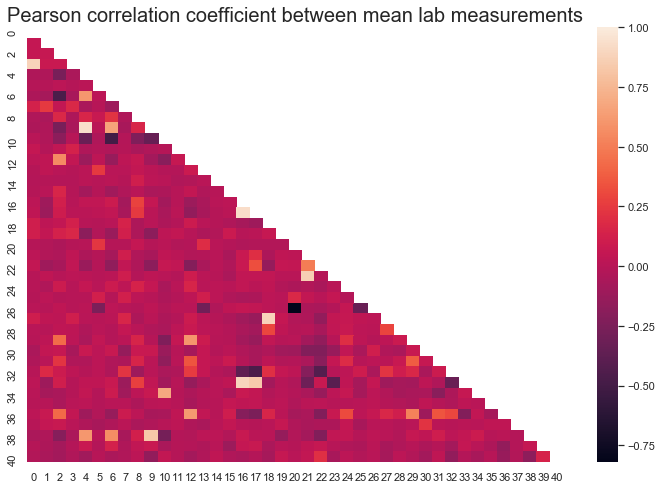

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate Pearson correlation coefficient
mean_cols = [col for col in numerical_columns if col.startswith('Mean_')]
corr_mat = np.corrcoef(df[mean_cols].values, rowvar=False)

mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_mat, annot=False, mask=mask)
ax.set_title("Pearson correlation coefficient between mean lab measurements", fontsize=20)
plt.savefig('../../reports/figures/pears_corr_coeff.png', format='png')

In [39]:
# Since the matrix is symmetrical we only want to analyze one half, and exclude the main diagonal which is 1 
# by definition
corr_mat_asym = np.tril(corr_mat, -1)
# pick a threshold for considering the colums linearly correlated, e.g. Pearson correlation coefficient = 0.75
# This is one of the parameters to vary
mean_bool_mask = abs(corr_mat_asym)>=0.75
mean_bool_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [40]:
# each column and each row in the boolean mask correspond to column names in mean_col list
# e.g. column 1 in the boolean matrix corresponds to the first element in the mean_col list
# in order to determine the element(s) in mean_cols that are correlated with the first element, apply the first column
# of the boolean mask to the mean_col list (get all the elements that correspond to True value)
# more generally, to find the elements correlated with element i of the mean_col list, apply the ith column of the 
# boolean mask to mean_cols list
from itertools import compress

corr_array = []
for i in range(len(mean_cols)):
    
    cors = list(compress(mean_cols,mean_bool_mask[:,i]))
    if cors!= []:
        for elem in cors:
            corr_array.append(elem)

In [41]:
# this is the list of linearly correlated redundant variables, NOT including the variables to which they are \
# correlated
print(corr_array)

['Mean_Asparate Aminotransferase (AST)', 'Mean_Calculated Total CO2', 'Mean_pCO2', 'Mean_Hemoglobin', 'Mean_Red Blood Cells', 'Mean_Red Blood Cells', 'Mean_PT', 'Mean_Neutrophils', 'Mean_MCV']


In [42]:
# however the list contains some dupicates, write a function to drop duplicates
def drop_duplicates(var_list):
    return list(dict.fromkeys(var_list))

corr_array = drop_duplicates(corr_array)
corr_array

['Mean_Asparate Aminotransferase (AST)',
 'Mean_Calculated Total CO2',
 'Mean_pCO2',
 'Mean_Hemoglobin',
 'Mean_Red Blood Cells',
 'Mean_PT',
 'Mean_Neutrophils',
 'Mean_MCV']

In [43]:
# Define a function for generating the array and dictionary with correlated columns
def corr_extractor(corr_mat, cols_list, thresh):
    """With correlation matrix, list of columns (for which the 
    correlation matrix was calculated), and threshold (f0r 
    cooefficient comparison) as input return an array of 
    redundant column (to drop) and a dictionary to inspect 
    the correlations."""
    corr_mat_asym = np.tril(corr_mat, -1) # set the top half triangle of the matrix (including main diagonal) to 0
    bool_mask = abs(corr_mat_asym)>=thresh # create a boolean mask for values above the threshold

    corr_array = [] # initiate empty array and dictionary
    corr_dict = {}
    
    for i in range(len(cols_list)): 
        # iterate through the columns in cols_array and extract the associated column names with the boolean mask
        cors = list(compress(cols_list, bool_mask[:,i]))
        if cors!= []:
            corr_dict[cols_list[i]]=[]
            # create a key value pair, key= (query) column name values = list of associated columns
            corr_dict[cols_list[i]]+=cors
            for elem in cors:
                corr_array.append(elem) # create a list only with the redundant column (excluding the query)
    
    corr_array = list(dict.fromkeys(corr_array)) # drop duplicates
    
    return corr_array, corr_dict

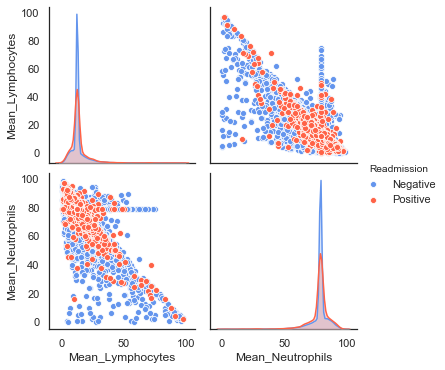

In [22]:
# generate a column for more informative figure plotting, 
df.loc[df['OUTPUT_LABEL'] == 1, 'Readmission'] = 'Positive'
df.loc[df['OUTPUT_LABEL'] == 0, 'Readmission'] = 'Negative'

# Create an array with the colors to use
colors = ["#6495ed", "#ff6347"]
# Set the custom color palette
sns.set_palette(sns.color_palette(colors))

immune = ['Mean_Lymphocytes','Mean_Neutrophils']
sns.pairplot(df, vars=immune, hue='Readmission')

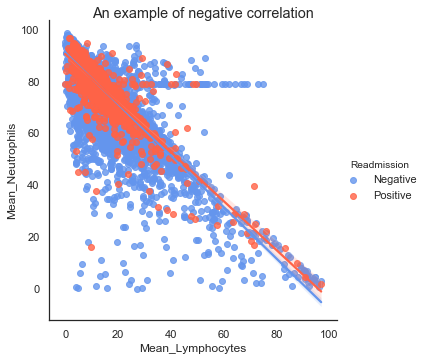

In [23]:
# a single plot will work better for showing the relationship between variables
sns.lmplot(x='Mean_Lymphocytes', y='Mean_Neutrophils', hue='Readmission', data=df)
plt.suptitle('An example of negative correlation', y=0.999)
plt.savefig('../../reports/figures/neg_lin_correl.png', format='png')

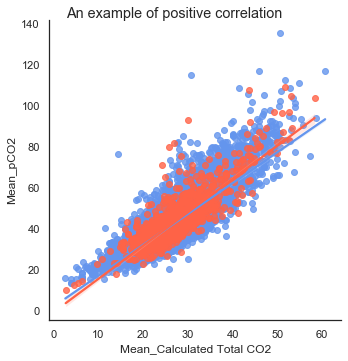

In [24]:
sns.lmplot(x='Mean_Calculated Total CO2', y='Mean_pCO2', hue='Readmission', data=df, legend=False)
plt.suptitle('An example of positive correlation', y=0.999)
plt.savefig('../../reports/figures/pos_lin_correl.png', format='png')

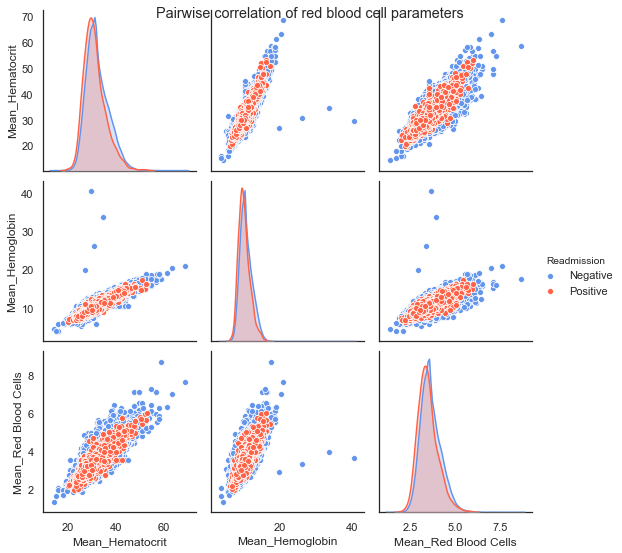

In [25]:
# Pairplot works better for looking at 3 or more pairwise correlations
blood_cor = ['Mean_Hematocrit' , 'Mean_Hemoglobin', 'Mean_Red Blood Cells']
sns.pairplot(df, vars=blood_cor, hue='Readmission', diag_kind='kde')
plt.suptitle('Pairwise correlation of red blood cell parameters', y=0.999)
plt.savefig('../../reports/figures/hem_blood_corr.png', format='png')

### The Pearson correlation analysis appears reasonable, process all numerical features in the same way.

In [45]:
print("The original number of numerical features is ", len(numerical_columns))
# compute the correlation matrix for all numerical features
corr_mat_num_all = np.corrcoef(df[numerical_columns].values, rowvar=False)
#extract the names of numerical columns  and dictionary of correlations (for reference)
num_corr_to_drop, num_corr_dict = corr_extractor(corr_mat_num_all, numerical_columns, 0.8)
print("The number of redundant numerical features is ", len(num_corr_to_drop))
print("The number of remaining numerical features is ", len(numerical_columns)-len(num_corr_to_drop))

The original number of numerical features is  125
The number of redundant numerical features is  45
The number of remaining numerical features is  80


In [46]:
# inspect the redundant columns
num_corr_to_drop

['Count_Anion Gap',
 'Count_Bicarbonate',
 'Count_Calcium, Total',
 'Count_Chloride',
 'Count_Creatinine',
 'Count_Glucose',
 'Count_Hematocrit',
 'Count_Hemoglobin',
 'Count_MCH',
 'Count_MCHC',
 'Count_MCV',
 'Count_Magnesium',
 'Count_Phosphate',
 'Count_Platelet Count',
 'Count_Potassium',
 'Count_RDW',
 'Count_Red Blood Cells',
 'Count_Sodium',
 'Count_Urea Nitrogen',
 'Count_White Blood Cells',
 'Count_Alkaline Phosphatase',
 'Count_Asparate Aminotransferase (AST)',
 'Count_Bilirubin, Total',
 'Count_Calculated Total CO2',
 'Count_Free Calcium',
 'Count_pCO2',
 'Count_pH',
 'Count_pO2',
 'Count_Eosinophils',
 'Count_Lymphocytes',
 'Count_Monocytes',
 'Count_Neutrophils',
 'Count_INR(PT)',
 'Count_PT',
 'Count_PTT',
 'Mean_Asparate Aminotransferase (AST)',
 'Mean_Calculated Total CO2',
 'Mean_pCO2',
 'Var_Free Calcium',
 'Mean_Hemoglobin',
 'Mean_Red Blood Cells',
 'Mean_PT',
 'Mean_Neutrophils',
 'Mean_MCV',
 'Var_MCV']

### Most redundant features are test counts, which is expected since multiple lab test are conducted at the same time, especially since we chose the most frequently administered tests.

In [51]:
df1 = df.drop(columns=num_corr_to_drop)
df1.to_csv('../../data/processed/cor_num_droped.csv')

### To measure the association of categorical variables we will compute Cramer's V coefficient, which is based on Chi squared statistic and takes values from 0 to 1. Note that Cramer's V calculation takes a long time, so we will first filter out categorical variables that are very weekly associated with the output label.

In [47]:
# Import the script containing the functions for calculating Cramer's V, correlation ratio, conditional entropy and 
# Theil's U
import os
import sys
sys.path.insert(0, os.path.abspath('../../src/'))
import entropy_funcs

In [67]:
cat_theils_array = []
for column in categorical_columns:
    cat_cor_ratio = entropy_funcs.theils_u(df.OUTPUT_LABEL.values, df[column].values)
    cat_theils_array.append(cat_cor_ratio)

Text(0.5, 1.0, 'Uncertainty coefficient between the categorical \nfeatures and the output label')

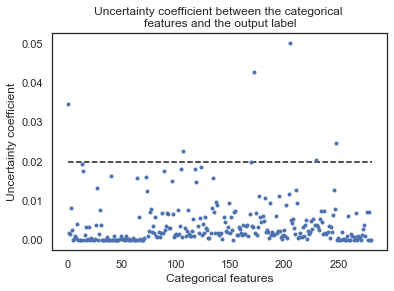

In [93]:
plt.plot(cat_theils_array, '.')
plt.hlines(y=0.02, xmin=0, xmax=len(cat_theils_array), ls='--')
plt.xlabel('Categorical features')
plt.ylabel('Uncertainty coefficient')
plt.title('Uncertainty coefficient between the categorical \nfeatures and the output label')
#plt.annotate('Filter threshold', (0, 0.006))
#plt.savefig('../../reports/figures/uncertainty_coef_output.png', format='png')

In [94]:
top_cat_features = [column for column in categorical_columns if cat_theils_array[categorical_columns.index(column)]>0.02]
top_cat_features

['1Y_PRIOR_ADM', 'complic', 'mcc', 'procedur', 'system', 'wo']

In [79]:
cat_cols_todrop_01 = [column for column in categorical_columns if cat_theils_array[categorical_columns.index(column)]<0.01]
len(cat_cols_todrop_01)

254

In [81]:
df5 = df.drop(columns=cat_cols_todrop_01)
df5.to_csv('../../data/processed/cat_01_TU_dropped.csv')

In [70]:
cat_cols_todrop_005 = [column for column in categorical_columns if cat_theils_array[categorical_columns.index(column)]<0.005]
len(cat_cols_todrop_005)

208

In [73]:
df2 = df.drop(columns=cat_cols_todrop_005)
df2.to_csv('../../data/processed/cat_005_TU_dropped.csv')

In [72]:
cat_cols_todrop_0025 = [column for column in categorical_columns if cat_theils_array[categorical_columns.index(column)]<0.0025]
len(cat_cols_todrop_0025)

162

In [75]:
df3 = df.drop(columns=cat_cols_todrop_0025)
df3.to_csv('../../data/processed/cat_0025_TU_dropped.csv')

In [76]:
df4 = df.drop(columns=cat_cols_todrop_005)
df4.drop(columns=num_corr_to_drop, inplace=True)
df4.to_csv('../../data/processed/cat_005_TU_num08_dropped.csv')

In [77]:
num_cor_ratio_array = []
for column in numerical_columns:
    num_cor_ratio = entropy_funcs.correlation_ratio(df.OUTPUT_LABEL.values, df[column].values)
    num_cor_ratio_array.append(num_cor_ratio)

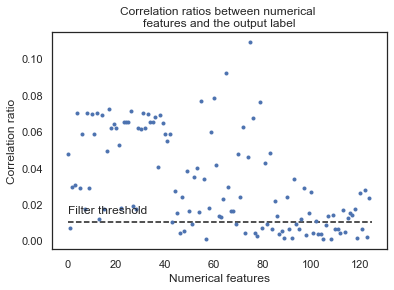

In [78]:
plt.plot(num_cor_ratio_array, '.')
plt.hlines(y=0.01, xmin=0, xmax=len(num_cor_ratio_array), ls='--')
plt.xlabel('Numerical features')
plt.ylabel('Correlation ratio')
plt.title('Correlation ratios between numerical \nfeatures and the output label')
plt.annotate('Filter threshold', (0, 0.015))
plt.savefig('../../reports/figures/corr_ratio_output.png', format='png')

In [83]:
num_cols_to_drop = [column for column in numerical_columns if num_cor_ratio_array[numerical_columns.index(column)]<0.01]
len(num_cols_to_drop)

33

In [88]:
#I'm curious to see what are the top features
top_num_cols = [column for column in numerical_columns if num_cor_ratio_array[numerical_columns.index(column)]>0.06]
top_num_cols

['Count_Anion Gap',
 'Count_Bicarbonate',
 'Count_Calcium, Total',
 'Count_Chloride',
 'Count_Creatinine',
 'Count_Glucose',
 'Count_Hematocrit',
 'Count_Hemoglobin',
 'Count_INR(PT)',
 'Count_MCH',
 'Count_MCHC',
 'Count_MCV',
 'Count_Magnesium',
 'Count_PT',
 'Count_PTT',
 'Count_Phosphate',
 'Count_Platelet Count',
 'Count_Potassium',
 'Count_RDW',
 'Count_Red Blood Cells',
 'Count_Sodium',
 'Count_Urea Nitrogen',
 'Count_White Blood Cells',
 'Mean_Creatinine',
 'Mean_Hemoglobin',
 'Mean_MCHC',
 'Mean_Phosphate',
 'Mean_RDW',
 'Mean_Red Blood Cells',
 'Mean_Urea Nitrogen']

In [84]:
df5.drop(columns=num_cols_to_drop, inplace=True)
df5.to_csv('../../data/processed/cat_01TU_num_01cor.csv')

In [92]:
df6 = pd.concat([df[top_cat_features], df[top_num_cols], df.OUTPUT_LABEL], axis=1)
df6.to_csv('../../data/processed/topcat_015_topnum_006.csv')

In [48]:
# as an example for evaluating Cramer's V let's look at the dignosis words, lets take a subset of 50
# the fisrt diagnosis word is 'abdomin' the last is 'wo'
first = df.columns.tolist().index('abdomin')
diag_word_cols = df.columns.tolist()[first:first+51]

In [31]:
# make a matrix with Cramer's V coefficient for all diagnosis word associations
# this may take a while because of the double loop
x = df[diag_word_cols]
corr_mat_cat = np.zeros((len(x.columns), len(x.columns)))
for i in range(len(x.columns)):
    for j in range(len(x.columns)):
        corr_mat_cat[i,j] = entropy_funcs.cramers_v(x.iloc[:,i], x.iloc[:,j])

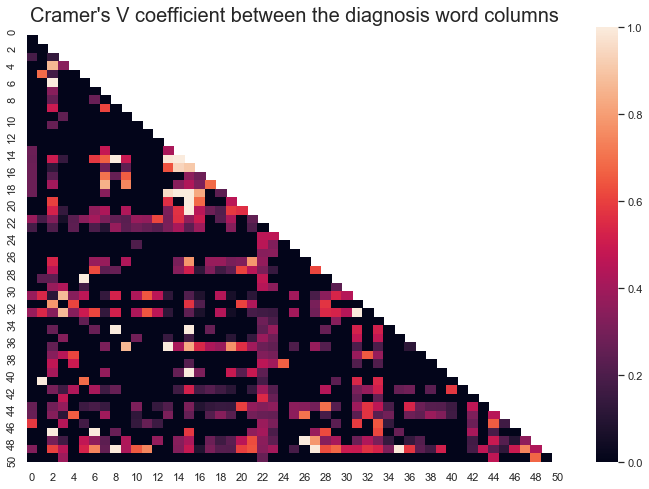

In [32]:
# Since the correlation matrix is symmetrical we will only plot half
mask = np.triu(np.ones_like(corr_mat_cat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_mat_cat, annot=False, mask=mask)#, fmt = '.2f', xticklabels=x.columns, yticklabels=x.columns)
ax.set_title("Cramer's V coefficient between the diagnosis word columns", fontsize=20)
plt.savefig('../../reports/figures/cat_correl.png', format='png')

In [33]:
# indeed, it appears some words are strongly asspciated, process with cor_extractor function
diag_corr_array, diag_corr_dict = corr_extractor(corr_mat_cat, diag_word_cols, 0.75)

In [34]:
# let's see 20 diagnosis word correlations
i=0
for key in diag_corr_dict.keys():
    print(key, diag_corr_dict[key])
    i+=1
    if i>=20:
        break

abus ['depend']
acut ['agent', 'aliv', 'complex', 'discharg']
age ['comorbid', 'complic']
alcohol ['cirrhosi']
aliv ['discharg']
ami ['cardiovascular']
arrhythmia ['cardiac', 'conduct', 'disord']
arteri ['coronari']
bypass ['cardiac', 'cath', 'coronari']
card ['cardiac', 'cardiothorac', 'cath']
cardiac ['cardiothorac', 'cath', 'cathet', 'catheter', 'circ', 'conduct', 'coronari', 'defibril']
cardiothorac ['cath']
cath ['coronari']
catheter ['circ']
chronic ['diseas']
circ ['diseas', 'disord']
comorbid ['complic']
conduct ['disord']


### The associations appear reasonable, procees all categorical variables the same way

In [49]:
# compute association for all categorical features, this may take a while
x = df[categorical_columns]
corr_mat_cat_all = np.zeros((len(x.columns), len(x.columns)))
for i in range(len(x.columns)):
    for j in range(len(x.columns)):
        corr_mat_cat_all[i,j] = entropy_funcs.cramers_v(x.iloc[:,i], x.iloc[:,j])

/Users/zhannahakhverdyan/Springboard/Capstone1/MIMIC-III-readmission-prediction/src/entropy_funcs.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


KeyboardInterrupt: 

In [36]:
np.isnan(corr_mat_cat_all).any()

True

In [37]:
# note the warning is a result of division by 0, which resulted from a small number being rounded to 0
# replace nan values with 0
corr_mat_cat_all = np.nan_to_num(corr_mat_cat_all)
np.isnan(corr_mat_cat_all).any()

False

In [38]:
print("The original number of original categorical features is ", len(categorical_columns))
#extract the names of categorical columns  and dictionary of correlations (for reference)
cat_corr_to_drop, cat_corr_dict = corr_extractor(corr_mat_cat_all, categorical_columns, 0.75)
print("The number of redundant categorical features is ", len(cat_corr_to_drop))
print("The number of remaining categorical features is ", len(categorical_columns)-len(cat_corr_to_drop))

The original number of original categorical features is  257
The number of redundant categorical features is  127
The number of remaining categorical features is  130


In [39]:
# visually inspect the redundant categorical features
cat_corr_to_drop

['SUBSECTIONHEADER_Other procedures',
 'SUBSECTIONHEADER_Pulmonary',
 'SUBSECTIONHEADER_Hematology and coagulation',
 'ami',
 'card',
 'cardiac',
 'cardiothorac',
 'cardiovascular',
 'cath',
 'cc',
 'maj',
 'oth',
 'percutan',
 'proc',
 'procedur',
 'valv',
 'wo',
 'depend',
 'agent',
 'aliv',
 'complex',
 'discharg',
 'infarct',
 'myocardi',
 'comorbid',
 'complic',
 'medicin',
 'cirrhosi',
 'hepat',
 'drugelut',
 'mcv',
 'perc',
 'shock',
 'stent',
 'conduct',
 'disord',
 'coronari',
 'problem',
 'tract',
 'larg',
 'major',
 'small',
 'cathet',
 'catheter',
 'circ',
 'defibril',
 'heart',
 'implant',
 'ischem',
 'pacemak',
 'mcc',
 'hemorrhag',
 'intracrani',
 'respiratori',
 'diseas',
 'obstruct',
 'pulmonari',
 'exc',
 'system',
 'liver',
 'head',
 'hr',
 'stupor',
 'traumat',
 'seizur',
 'without',
 'malfunct',
 'peptic',
 'treatment',
 'hiv',
 'relat',
 'musculoskelet',
 'tissu',
 'endovascular',
 'trauma',
 'occulus',
 'precerebr',
 'reaction',
 'hour',
 'mechan',
 'sign',
 'sym

In [40]:
# create a list with total columns to drop
total_col_to_drop = cat_corr_to_drop + num_corr_to_drop
len(total_col_to_drop)

173

In [41]:
df.drop(columns=total_col_to_drop, inplace=True)
len(df.columns)

211

In [42]:
# also remove the redundant columns from respective numerical and categorical feature list
cat_columns_filt = [column for column in categorical_columns if column not in cat_corr_to_drop]
num_columns_filt = [column for column in numerical_columns if column not in num_corr_to_drop]
# sanity check
assert len(cat_columns_filt) == len(categorical_columns) - len(cat_corr_to_drop), "math doesn't work"
assert len(num_columns_filt) == len(numerical_columns) - len(num_corr_to_drop), "math doesn't work"

### Final filtering of features
1. Numerical fitures. As a final step we will calculate the correlation ratio between numerical features and the output label. A correlation ratio takes values between 0 and 1 and tells us how much does the dispertion between categories contribute to overall dispersion. At 1, entire dispersion is due to dispersion between categoris, at 0, there is no dispersion between categoris. The idea behind using this metric is that a variable with a correlation ratio of 0 means that there is no difference in this measurement between positive and negative readmissions, which means this variable will not be useful in distinguishing this categories. 

2. Categorical features. To estimate the usefulness od categorical features we will calculate Theil's U  coefficient (uncertainty coefficient) between each categorical variable and the output label. Theil's U is an assymetrical measure of association between nominal variables and it tells us given 1 variable how well can we predict the category of the other variable. 1 mean complete association, 0 means no association. The reasoning for using this filter is the same, variables with uncertainty cofficient of 0 will not be useful for predicting the output label.

In [44]:
num_cor_ratio_array = []
for column in num_columns_filt:
    num_cor_ratio = entropy_funcs.correlation_ratio(df.OUTPUT_LABEL.values, df[column].values)
    num_cor_ratio_array.append(num_cor_ratio)

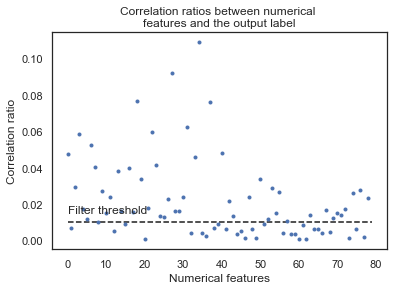

In [55]:
plt.plot(num_cor_ratio_array, '.')
plt.hlines(y=0.01, xmin=0, xmax=len(num_cor_ratio_array), ls='--')
plt.xlabel('Numerical features')
plt.ylabel('Correlation ratio')
plt.title('Correlation ratios between numerical \nfeatures and the output label')
plt.annotate('Filter threshold', (0, 0.015))
plt.savefig('../../reports/figures/corr_ratio_output.png', format='png')

In [46]:
num_columns_filt2 = [column for column in num_columns_filt if num_cor_ratio_array[num_columns_filt.index(column)]>=0.01]
len(num_columns_filt2)

50

In [47]:
num_cols_to_drop2 = [column for column in num_columns_filt if num_cor_ratio_array[num_columns_filt.index(column)]<0.01]
len(num_cols_to_drop2)

29

In [61]:
# inspect the columns to drop
num_cols_to_drop2

['AGE',
 'Mean_Basophils',
 'Mean_Calcium, Total',
 'Mean_Free Calcium',
 'Mean_Platelet Count',
 'Mean_Sodium',
 'Mean_Specific Gravity',
 'Mean_White Blood Cells',
 'Mean_pH',
 'Var_Alanine Aminotransferase (ALT)',
 'Var_Asparate Aminotransferase (AST)',
 'Var_Base Excess',
 'Var_Basophils',
 'Var_Bilirubin, Total',
 'Var_Calcium, Total',
 'Var_Chloride',
 'Var_Hemoglobin',
 'Var_Lactate',
 'Var_Lymphocytes',
 'Var_MCH',
 'Var_MCHC',
 'Var_Magnesium',
 'Var_Neutrophils',
 'Var_PT',
 'Var_PTT',
 'Var_Platelet Count',
 'Var_Specific Gravity',
 'Var_White Blood Cells',
 'Var_pH']

In [48]:
cat_theils_array = []
for column in cat_columns_filt:
    cat_cor_ratio = entropy_funcs.theils_u(df.OUTPUT_LABEL.values, df[column].values)
    cat_theils_array.append(cat_cor_ratio)

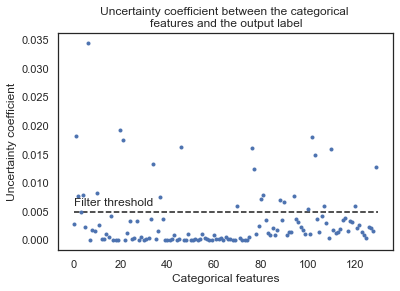

In [58]:
plt.plot(cat_theils_array, '.')
plt.hlines(y=0.005, xmin=0, xmax=len(cat_theils_array), ls='--')
plt.xlabel('Categorical features')
plt.ylabel('Uncertainty coefficient')
plt.title('Uncertainty coefficient between the categorical \nfeatures and the output label')
plt.annotate('Filter threshold', (0, 0.006))
plt.savefig('../../reports/figures/uncertainty_coef_output.png', format='png')

In [59]:
cat_columns_filt2 = [column for column in cat_columns_filt if cat_theils_array[cat_columns_filt.index(column)]>=0.005]
len(cat_columns_filt2)

25

In [60]:
cat_cols_todrop2 = [column for column in cat_columns_filt if cat_theils_array[cat_columns_filt.index(column)]<0.005]
len(cat_cols_todrop2)

105

In [62]:
# inspect columns to drop
cat_cols_todrop2

['ADMISSION_LOCATION',
 'LANGUAGE',
 'MARITAL_STATUS',
 'GENDER',
 'CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED',
 'CURR_SERVICE_ORTHO',
 'CURR_SERVICE_SURG',
 'CURR_SERVICE_TRAUM',
 'CURR_SERVICE_TSURG',
 'CURR_SERVICE_VSURG',
 'SECTIONHEADER_Anesthesia',
 'SECTIONHEADER_Pathology and laboratory',
 'SECTIONHEADER_Radiology',
 'SECTIONHEADER_Surgery',
 'SUBSECTIONHEADER_Bone/joint studies',
 'SUBSECTIONHEADER_Cardiovascular',
 'SUBSECTIONHEADER_Cardiovascular system',
 'SUBSECTIONHEADER_Case management services',
 'SUBSECTIONHEADER_Central nervous system assessments/tests (neuro-cognitive, mental status, speech testing)',
 'SUBSECTIONHEADER_Chemistry',
 'SUBSECTIONHEADER_Confirmatory consultation for a new or established patient (deleted codes)',
 'SUBSECTIONHEADER_Conscious sedation (deleted codes)',
 'SUBSECTIONHEADER_Consultations',
 'SUBSECTIONHEADER_Diagnostic imaging',
 'SUBSECTIONHEADER_Diagnostic ultrasound',
 'SUB

In [63]:
# combine and drop the uninformative categorical and numerical features
total_cols_to_drop2 = cat_cols_todrop2 + num_cols_to_drop2
df.drop(columns=total_cols_to_drop2, inplace=True)
df.shape

(37571, 77)

In [64]:
# inspect the columns to identify if any need dummy encoding
df.columns

Index(['DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION', 'OUTPUT_LABEL',
       '1Y_PRIOR_ADM', 'LENGTH_OF_STAY_DAYS', 'CURR_SERVICE_MED',
       'SECTIONHEADER_Evaluation and management', 'SECTIONHEADER_Medicine',
       'SUBSECTIONHEADER_Critical care services', 'SUBSECTIONHEADER_Dialysis',
       'SUBSECTIONHEADER_Hospital inpatient services',
       'SUBSECTIONHEADER_Respiratory system',
       'Count_Alanine Aminotransferase (ALT)', 'Count_Base Excess',
       'Count_Basophils', 'Count_Creatine Kinase (CK)', 'Count_Lactate',
       'Count_Specific Gravity', 'Mean_Alanine Aminotransferase (ALT)',
       'Mean_Alkaline Phosphatase', 'Mean_Anion Gap', 'Mean_Base Excess',
       'Mean_Bicarbonate', 'Mean_Bilirubin, Total', 'Mean_Chloride',
       'Mean_Creatine Kinase (CK)', 'Mean_Creatinine', 'Mean_Eosinophils',
       'Mean_Glucose', 'Mean_Hematocrit', 'Mean_INR(PT)', 'Mean_Lactate',
       'Mean_Lymphocytes', 'Mean_MCH', 'Mean_MCHC', 'Mean_Magnesium',
       'Mean_Monocytes', 'Mean_PT

In [67]:
#dummy code discharge location, insurance and ethnicity
categorical = ['DISCHARGE_LOCATION','INSURANCE','ETHNICITY_GROUPED']
df = pd.get_dummies(data=df, prefix=categorical, prefix_sep='_', columns=categorical, drop_first=True)

In [71]:
# Drop Readmission column, which was created for plotting, also Religion, since it is not a generalizable variable
cols_to_drop = ['RELIGION', 'Readmission']
df.drop(columns=cols_to_drop, inplace=True)
print(df.shape)
print(df.columns)

(37571, 95)
Index(['OUTPUT_LABEL', '1Y_PRIOR_ADM', 'LENGTH_OF_STAY_DAYS',
       'CURR_SERVICE_MED', 'SECTIONHEADER_Evaluation and management',
       'SECTIONHEADER_Medicine', 'SUBSECTIONHEADER_Critical care services',
       'SUBSECTIONHEADER_Dialysis',
       'SUBSECTIONHEADER_Hospital inpatient services',
       'SUBSECTIONHEADER_Respiratory system',
       'Count_Alanine Aminotransferase (ALT)', 'Count_Base Excess',
       'Count_Basophils', 'Count_Creatine Kinase (CK)', 'Count_Lactate',
       'Count_Specific Gravity', 'Mean_Alanine Aminotransferase (ALT)',
       'Mean_Alkaline Phosphatase', 'Mean_Anion Gap', 'Mean_Base Excess',
       'Mean_Bicarbonate', 'Mean_Bilirubin, Total', 'Mean_Chloride',
       'Mean_Creatine Kinase (CK)', 'Mean_Creatinine', 'Mean_Eosinophils',
       'Mean_Glucose', 'Mean_Hematocrit', 'Mean_INR(PT)', 'Mean_Lactate',
       'Mean_Lymphocytes', 'Mean_MCH', 'Mean_MCHC', 'Mean_Magnesium',
       'Mean_Monocytes', 'Mean_PTT', 'Mean_Phosphate', 'Mean_Potassi

In [72]:
# The dataset is ready for model fitting, note on the next iteration of the analysis dummy code the categorical 
# columns before filtering
df.to_csv('../../data/processed/for_machine_learning.csv')